Dataset used: Red wine quality (https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) \
\
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

## Downloading libraries and data

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [ ]:
# loading the dataset
!wget -O winequality.csv 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

--2021-12-13 07:14:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality.csv’

winequality.csv     100%[===================>]  82.23K   317KB/s    in 0.3s    

2021-12-13 07:14:53 (317 KB/s) - ‘winequality.csv’ saved [84199/84199]



In [ ]:
# reading data into df
df = pd.read_csv("winequality.csv", sep=';')

## Exploring the data

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print(df.shape)

(1599, 12)


In [ ]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


Conclusion: 'total sulfur dioxide' includes 'free sulfur dioxide'. Should one of them be excluded from the dataset?

In [ ]:
# Checking type of data and % of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Conclusion: There are no missing values in out data set

### Checking representetion of different classes in the data set

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Counts')

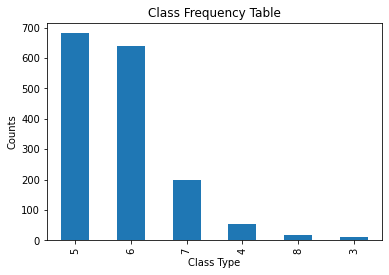

In [ ]:
df['quality'].value_counts().plot(kind='bar')
plt.title('Class Frequency Table')
plt.xlabel('Class Type')
plt.ylabel('Counts')

Conclusion: clasess are disbalanced

### Checking summary of numerical data

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Conclusion: Citric acid, recidual sugar, chlorides, dioxide, sulfur dioxide have high std (around +-50% or more)

### Checking type of distribution of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f285e8eb110>,
      dtype=object)

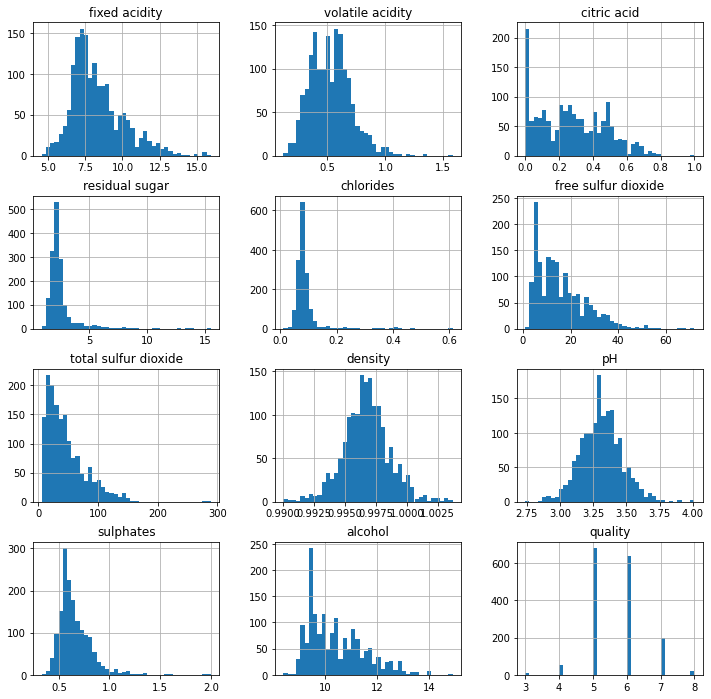

In [ ]:
df.hist(bins=40, figsize=(12,12))

In [ ]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Conclusion: some destributions are scewed

### Checking correletion between the features and noisiness

In [ ]:
# Building a correlation matrix
corr_matrix = df.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


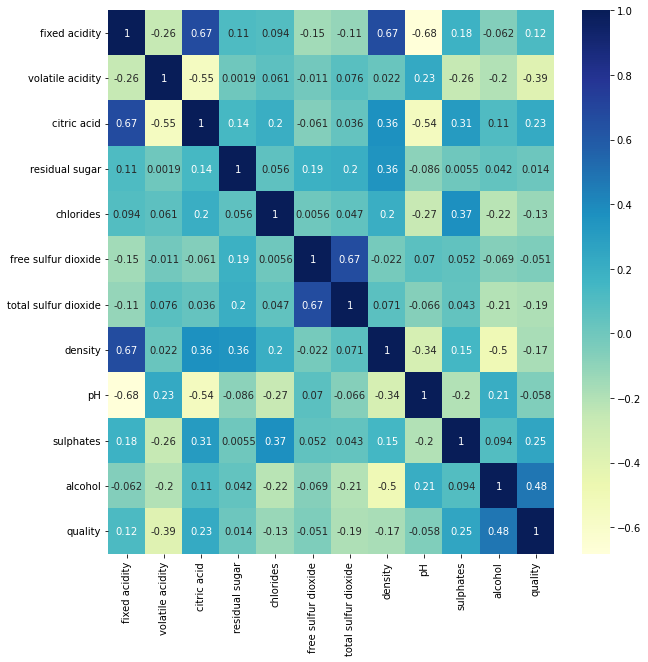

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True);

Conclusion: For this task I decided to predict fixed acidity. Citric acid, dencity and pH are the most promising attributes to predict fixed acidity. All other features have some small influence on prediction, espacially alcohol. 
Moreover, total sulfur dioxide is strongly correlated with free sulfur dioxide. 


Above we calculated liniar calculation. Let's build scater plots of the most promicing features to predict fixed acidity to see the noisiness and non-liniar correlation tendencies

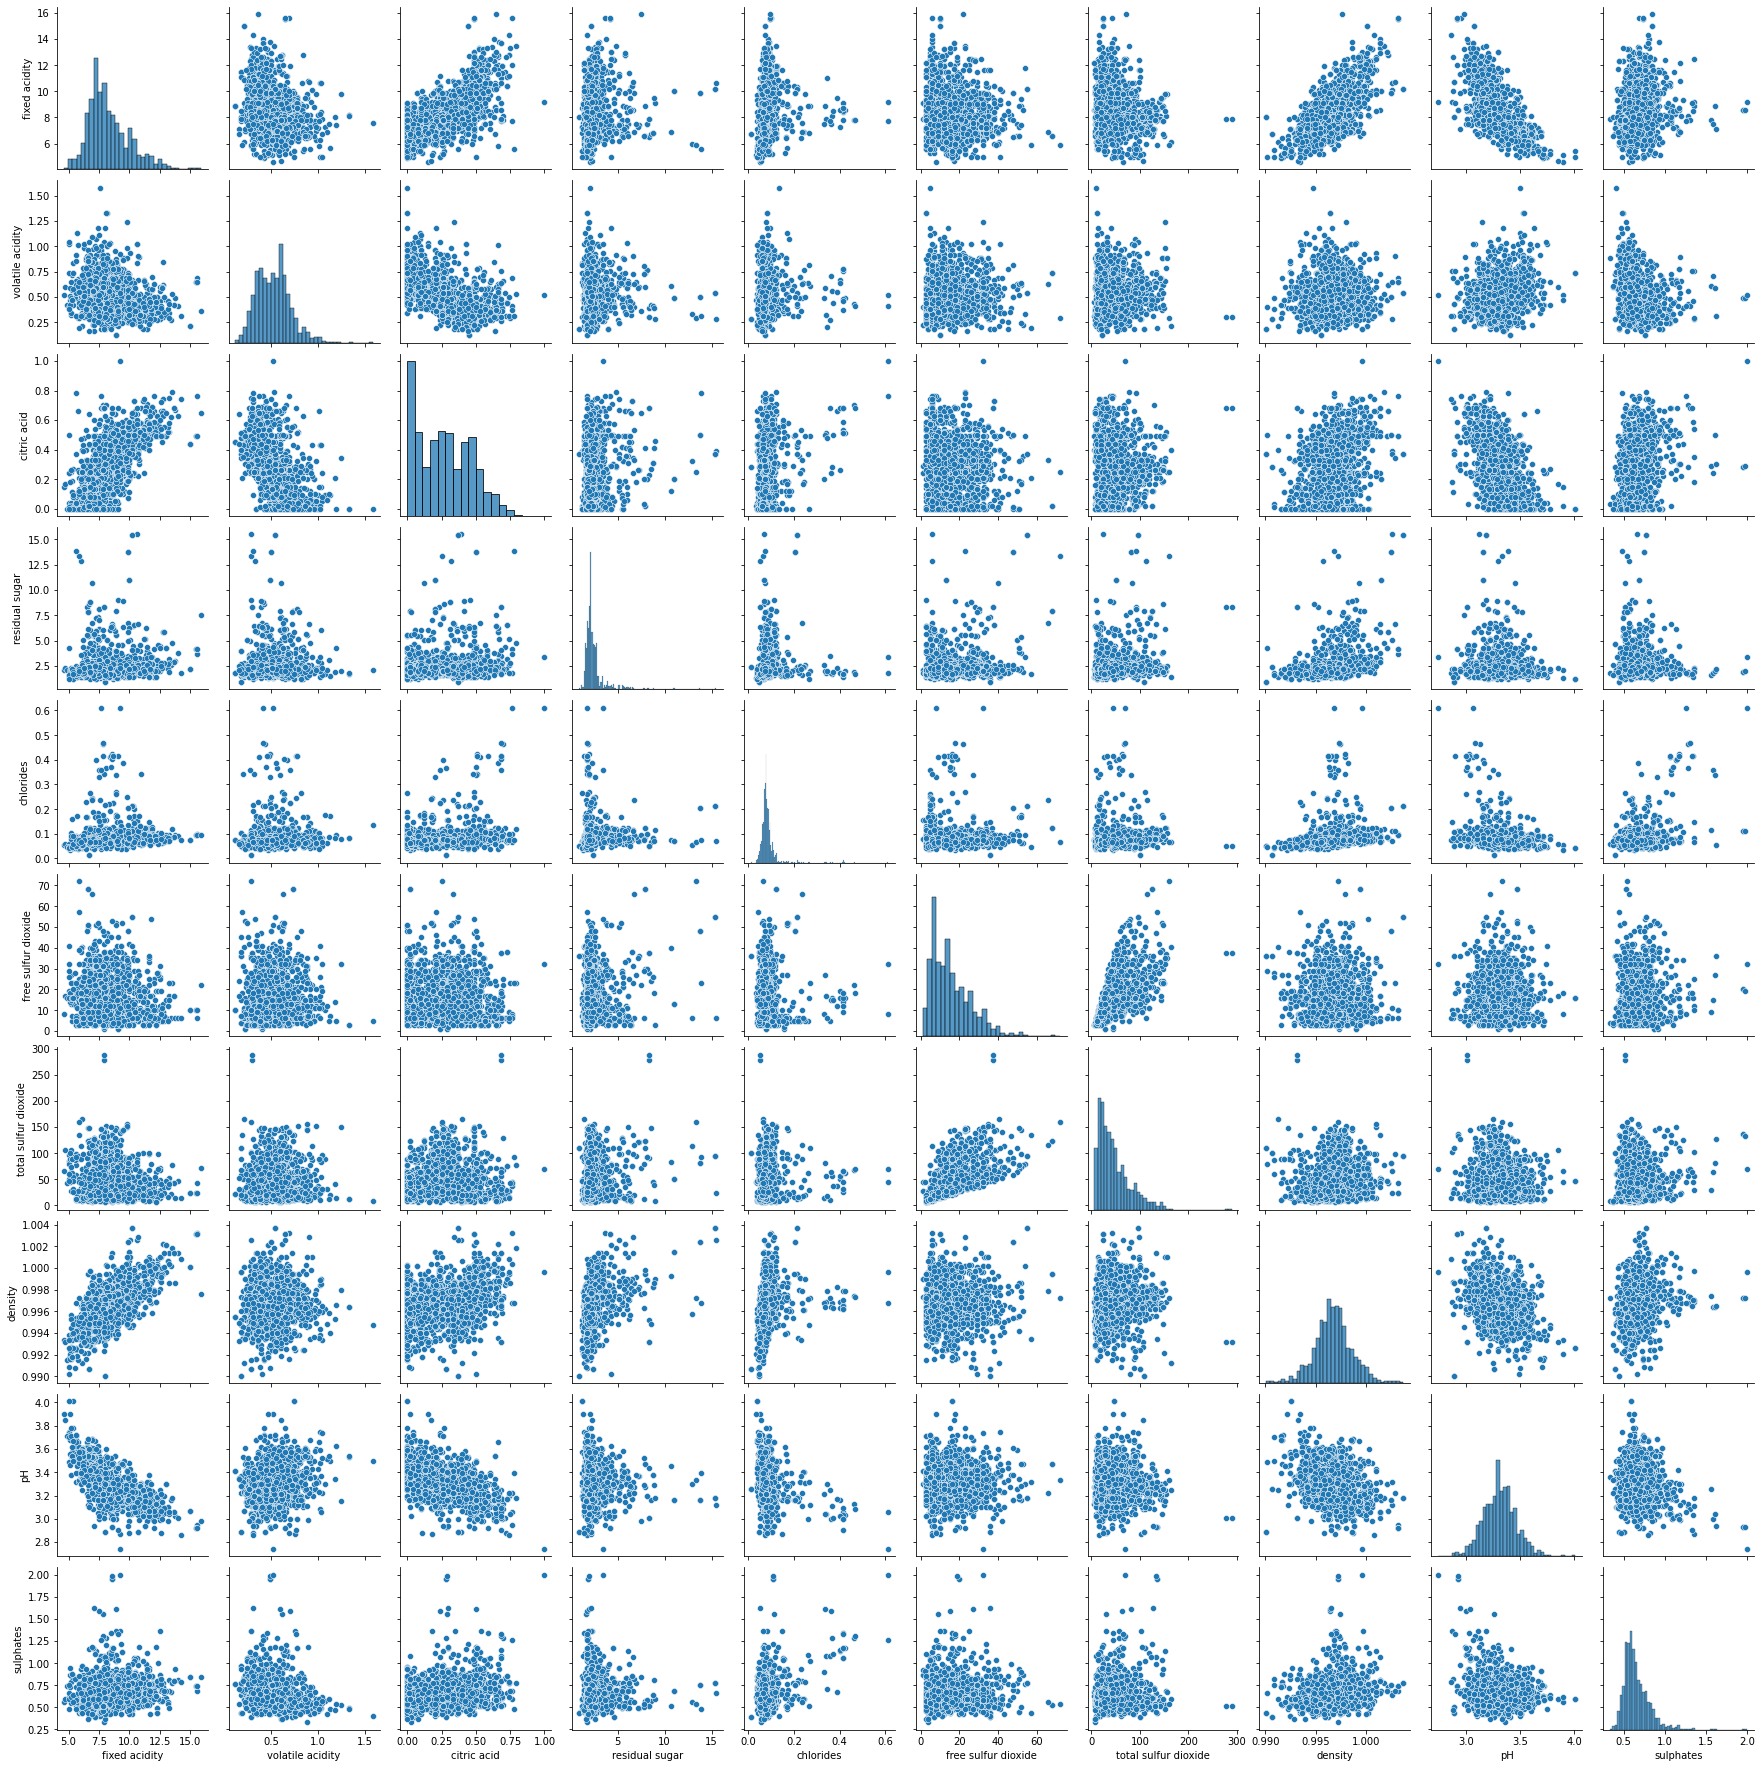

In [ ]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']])

### Checking the data for outliers

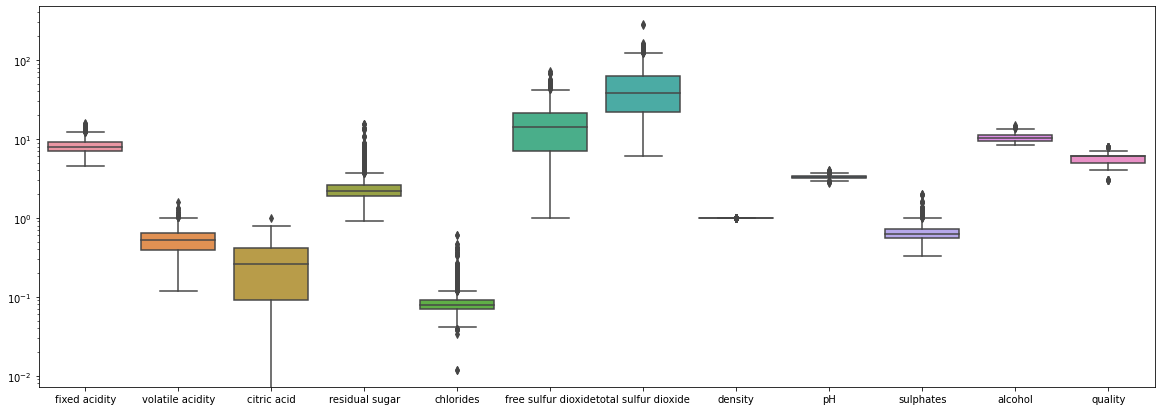

In [ ]:
fig = plt.figure(figsize=(20,7)) 
ax = fig.gca()
sns.boxplot(data=df)
plt.yscale('log')

Conclusion: majority of features have outliers

## Data pre-processing

In [ ]:
# removing quality feature from the dataset and highly correlation total sulfur dioxide feature
df = df.drop(['quality','total sulfur dioxide'], axis=1) 

In [ ]:
# Removing outliers beyond 3 sigma boundaries 
sigma_threshold = 3
low = stats.norm.cdf(-sigma_threshold)
high = stats.norm.cdf(sigma_threshold)
quant_data = df.quantile([low, high])
                         
for name in list(df.drop(labels=['fixed acidity'], axis=1).columns):
    df = df[(df[name] > quant_data.loc[low, name]) & (df[name] < quant_data.loc[high, name])]
print(df.shape)

(1424, 10)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data to train and test correspodingly. 80% data-train, 20%-test
X = df.drop(labels=['fixed acidity'], axis=1)
Y = df['fixed acidity']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 42) 

In [ ]:
# I will perform Z-score and MinMax normalization to choose the most suitable for models
# Standartisation (mean=0, sd=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train_arrey = scaler.fit_transform(X_train)
scaled_X_test_arrey = scaler.transform(X_test)

scaled_X_train = pd.DataFrame(scaled_X_train_arrey, index=X_train.index, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test_arrey, index=X_test.index, columns=X_test.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2850b563d0>,
      dtype=object)

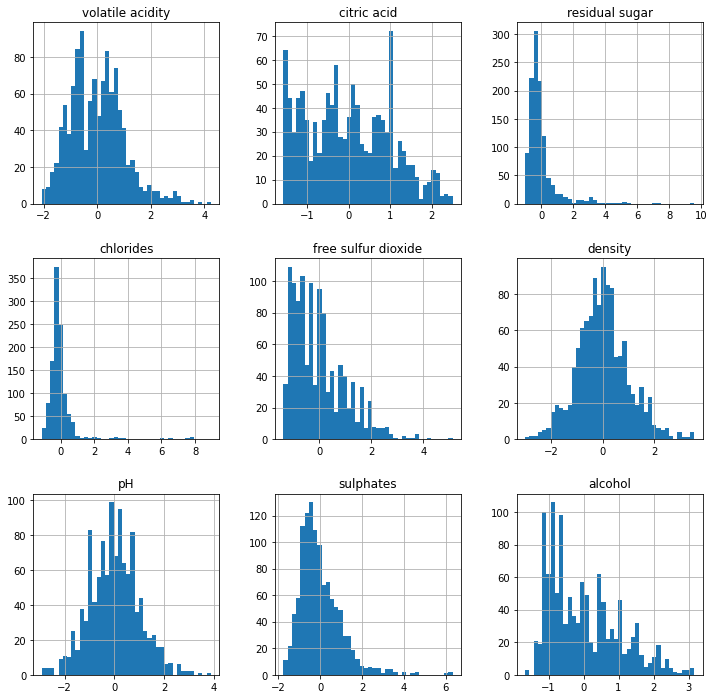

In [ ]:
scaled_X_train.hist(bins=40,figsize=(12,12))

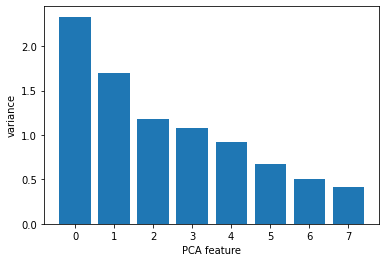

In [ ]:
# After running the code Z-score normalisation showed better results for models where PCA application is needed 
# Reducing diamentions with PCA
from sklearn.decomposition import PCA

pca = PCA(0.95)  
pca_X_train = pd.DataFrame(pca.fit_transform(scaled_X_train))
pca_X_test = pd.DataFrame(pca.transform(scaled_X_test))

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

In [ ]:
# For NN, Boosting and RF I'll Normalize the data
# Normalisation
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
norm_X_train_arrey = norm.fit_transform(X_train)
norm_X_test_arrey = norm.fit_transform(X_test)

norm_X_train = pd.DataFrame(norm_X_train_arrey, index=X_train.index, columns=X_train.columns)
norm_X_test = pd.DataFrame(norm_X_test_arrey, index=X_test.index, columns=X_test.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2850b56f50>,
      dtype=object)

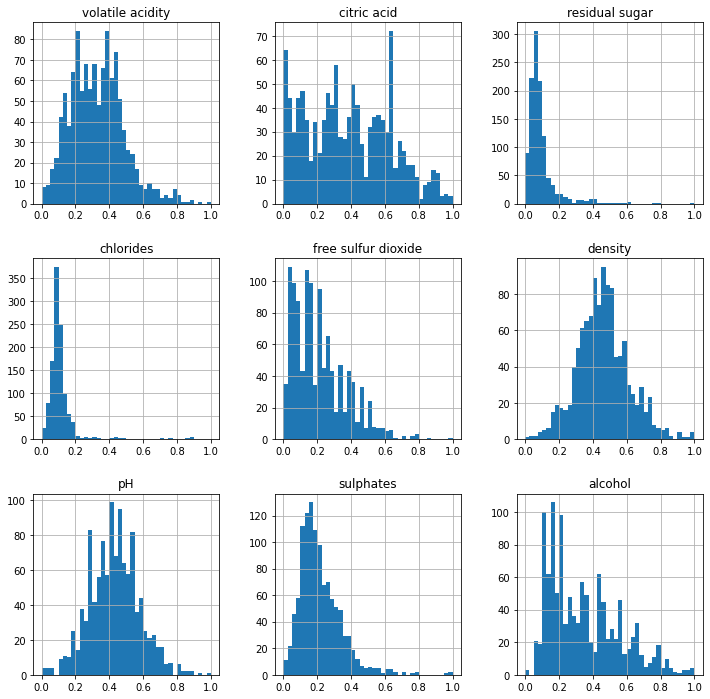

In [ ]:
norm_X_train.hist(bins=40,figsize=(12,12))

## Building regression models

### Liniar Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_rm = LinearRegression()
linear_rm.fit(pca_X_train, Y_train)
linear_rm_predict_Y =linear_rm.predict(pca_X_test)

In [ ]:
linear_rm_r2 = r2_score(Y_test, linear_rm_predict_Y)
linear_rm_rmse = sqrt(mean_squared_error(Y_test, linear_rm_predict_Y))
print("R^2: ", linear_rm_r2, "  RMSE: ", linear_rm_rmse) # найти табличку R2-задача регрессии

R^2:  0.8042720590724883   RMSE:  0.7482329929051436


In [ ]:
linear_rm_combined_df = pd.DataFrame({'observed_data' : Y_test, 'predicted_data' : linear_rm_predict_Y})
linear_rm_combined_df

,observed_data,predicted_data
1333,9.1,9.278665
747,8.6,8.806922
1206,7.2,8.106798
1113,8.9,9.548453
1051,8.5,8.775308
...,...,...
1525,6.7,6.827542
1245,7.4,7.232161
1011,8.9,8.405144
979,12.2,10.403419


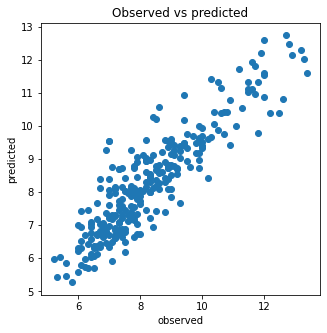

In [ ]:
plt.figure(figsize=(5,5))
plt.xlabel('observed')
plt.ylabel('predicted')
plt.title("Observed vs predicted")
plt.scatter(linear_rm_combined_df['observed_data'], linear_rm_combined_df['predicted_data'])

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

alphas = list(range(0,5))
cv = ShuffleSplit(n_splits=5, random_state=0)

ridge_grid_search = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas), cv=cv)
ridge_grid_search.fit(pca_X_train, Y_train)
ridge_rm_Y_predict =ridge_grid_search.predict(pca_X_test)

print("Best params:", ridge_grid_search.best_params_)
print("Best cross validaton score", ridge_grid_search.best_score_)   

Best params: {'alpha': 4}
Best cross validaton score 0.7851990872159185


In [ ]:
ridge_grid_search_r2 = r2_score(Y_test, ridge_rm_Y_predict)
ridge_grid_search_rmse = sqrt(mean_squared_error(Y_test, ridge_rm_Y_predict))
print("R^2: ", ridge_grid_search_r2, "  RMSE: ", ridge_grid_search_rmse) 

R^2:  0.8043373646455201   RMSE:  0.7481081567148662


In [ ]:
ridge_combined_df = pd.DataFrame({'observed_data' : Y_test, 'predicted_data' : ridge_rm_Y_predict})
ridge_combined_df

,observed_data,predicted_data
1333,9.1,9.272918
747,8.6,8.809129
1206,7.2,8.107507
1113,8.9,9.549954
1051,8.5,8.786466
...,...,...
1525,6.7,6.833959
1245,7.4,7.233817
1011,8.9,8.408574
979,12.2,10.396841


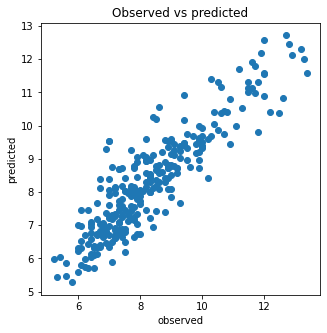

In [ ]:
plt.figure(figsize=(5,5))
plt.xlabel('observed')
plt.ylabel('predicted')
plt.title("Observed vs predicted")
plt.scatter(ridge_combined_df['observed_data'], ridge_combined_df['predicted_data'])

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

# define grid
en_param_grid = {'alpha' : [0.001, 0.01, 0.02],
        'l1_ratio' : [0.01, 0, 0.1],
        'tol' : [0.00001, 0.0001]}

cv = ShuffleSplit(n_splits=5, random_state=0)

# define search
en_grid_search = GridSearchCV(estimator=ElasticNet(), param_grid=en_param_grid, scoring='r2', cv=cv) 
en_grid_search.fit(pca_X_train, Y_train)
en_Y_predict = en_grid_search.predict(pca_X_test)

In [ ]:
print("Best params:", en_grid_search.best_params_)
print("Best cross validaton score", en_grid_search.best_score_)  

Best params: {'alpha': 0.01, 'l1_ratio': 0, 'tol': 1e-05}
Best cross validaton score 0.7852098407106337


In [ ]:
en_search_r2 = r2_score(Y_test, en_Y_predict)
en_search_rmse = sqrt(mean_squared_error(Y_test, en_Y_predict))
print("R^2: ", en_search_r2, "  RMSE: ", en_search_rmse) # найти табличку R2-задача регрессии

R^2:  0.8044028870930338   RMSE:  0.7479828850150806


In [ ]:
en_combined_df = pd.DataFrame({'observed_data' : Y_test, 'predicted_data' : en_Y_predict})
en_combined_df

,observed_data,predicted_data
1333,9.1,9.262495
747,8.6,8.813070
1206,7.2,8.108839
1113,8.9,9.552543
1051,8.5,8.806682
...,...,...
1525,6.7,6.845594
1245,7.4,7.236895
1011,8.9,8.414729
979,12.2,10.384851


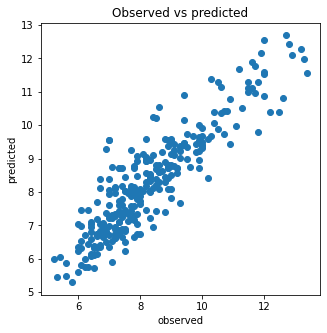

In [ ]:
plt.figure(figsize=(5,5))
plt.xlabel('observed')
plt.ylabel('predicted')
plt.title("Observed vs predicted")
plt.scatter(en_combined_df['observed_data'], en_combined_df['predicted_data'])

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]

cv = ShuffleSplit(n_splits=5, random_state=0)

lasso_grid_search = GridSearchCV(estimator=Lasso(), cv=cv, param_grid=dict(alpha=alphas))
lasso_grid_search.fit(pca_X_train, Y_train)
lasso_predict_Y = lasso_grid_search.best_estimator_.predict(pca_X_test)

In [ ]:
print("Best params:", lasso_grid_search.best_params_)
print("Best cross validaton score", lasso_grid_search.best_score_) 

Best params: {'alpha': 0.0}
Best cross validaton score 0.7851628062369578


In [ ]:
lasso_search_r2 = r2_score(Y_test, lasso_predict_Y)
lasso_search_rmse = sqrt(mean_squared_error(Y_test, lasso_predict_Y))
print("R^2: ", lasso_search_r2, "  RMSE: ", lasso_search_rmse) # найти табличку R2-задача регрессии

R^2:  0.8042720590724886   RMSE:  0.7482329929051431


In [ ]:
lasso_combined_df = pd.DataFrame({'observed_data' : Y_test, 'predicted_data' : lasso_predict_Y})
lasso_combined_df

,observed_data,predicted_data
1333,9.1,9.278665
747,8.6,8.806922
1206,7.2,8.106798
1113,8.9,9.548453
1051,8.5,8.775308
...,...,...
1525,6.7,6.827542
1245,7.4,7.232161
1011,8.9,8.405144
979,12.2,10.403419


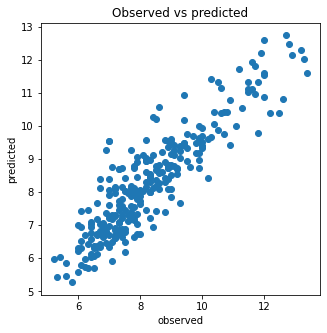

In [ ]:
plt.figure(figsize=(5,5))
plt.xlabel('observed')
plt.ylabel('predicted')
plt.title("Observed vs predicted")
plt.scatter(lasso_combined_df['observed_data'], lasso_combined_df['predicted_data'])

### SVM (Support Vector Machines)

In [ ]:
from sklearn.svm import SVR

# kernels - ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
# defining parameter range 
svm_param_grid = {'C': list(range(115,130)),  
              'gamma': [0.0001, 0.001, 0.01], 
              'kernel': ['rbf']}  # I checked other types of kernels as well, 'rbf' proved to be the best, it takes considerebly more time to recalculate model with multiple kernels, if I want to tune other parameters, so I lest only one, which works the best

cv = ShuffleSplit(n_splits=5, random_state=0)

svm_grid_search = GridSearchCV(SVR(), svm_param_grid, cv=cv, n_jobs=-1)  
svm_grid_search.fit(pca_X_train, Y_train)
svm_Y_predicted = svm_grid_search.best_estimator_.predict(pca_X_test)

In [ ]:
#The best parameters of the model
print("Best params:", svm_grid_search.best_params_)
print("Best cross validaton score", svm_grid_search.best_score_) 

Best params: {'C': 124, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross validaton score 0.8043213572838658


In [ ]:
svm_r2 = r2_score(Y_test,svm_Y_predicted)
svm_rmse = sqrt(mean_squared_error(Y_test, svm_Y_predicted))
print("R^2: ", svm_r2, "  RMSE: ", svm_rmse)

R^2:  0.8173333359935688   RMSE:  0.7228365248783742


In [ ]:
cvm_combined_df = pd.DataFrame({'observed_data' : Y_test, 'predicted_data' : svm_Y_predicted})
cvm_combined_df

,observed_data,predicted_data
1333,9.1,9.067385
747,8.6,8.731301
1206,7.2,7.983517
1113,8.9,9.472656
1051,8.5,8.442051
...,...,...
1525,6.7,6.829653
1245,7.4,7.224671
1011,8.9,8.351902
979,12.2,10.402733


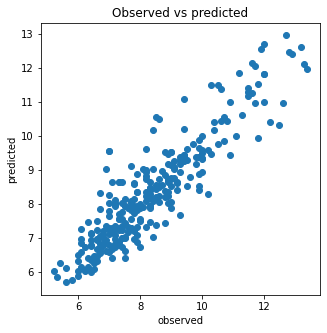

In [ ]:
plt.figure(figsize=(5,5))
plt.xlabel('observed')
plt.ylabel('predicted')
plt.title("Observed vs predicted")
plt.scatter(cvm_combined_df['observed_data'], cvm_combined_df['predicted_data'])

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_param_grid = {'max_depth': list(range(15,30)),
                  'min_samples_leaf': [1,2],
                  'min_samples_split': [1,2],
                  'n_estimators': [500]}

cv = ShuffleSplit(n_splits=5, random_state=0)

RF_grid_search = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), 
                                  RF_param_grid, 
                                  verbose=True, n_jobs=-1, cv=cv,
                                  scoring='r2')

RF_grid_search.fit(norm_X_train, Y_train)
RF_Y_predicted = RF_grid_search.best_estimator_.predict(norm_X_test)

In [ ]:
#The best parameters of the model
print("Best params:", RF_grid_search.best_params_)
print("Best cross validaton score", RF_grid_search.best_score_) 

Best params: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best cross validaton score 0.8601717138803103


In [ ]:
# feature importances
# feature importances
pd.DataFrame({'Feature' : list(X_train.columns), 'Importance' : RF_grid_search.best_estimator_.feature_importances_})

In [ ]:
RF_r2 = r2_score(Y_test, RF_Y_predicted)
RF_rmse = sqrt(mean_squared_error(Y_test, RF_Y_predicted))
print("R^2: ", RF_r2, "  RMSE: ", RF_rmse)

R^2:  0.8113233323950063   RMSE:  0.7346314878336221


In [ ]:
RF_combined_df = pd.DataFrame({'observed_data' : Y_test, 'predicted_data' : RF_Y_predicted})
RF_combined_df

,observed_data,predicted_data
1333,9.1,9.213600
747,8.6,8.754400
1206,7.2,7.265800
1113,8.9,9.446400
1051,8.5,8.631800
...,...,...
1525,6.7,6.970236
1245,7.4,6.791850
1011,8.9,8.280000
979,12.2,11.091400


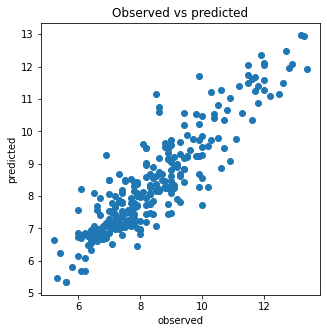

In [ ]:
plt.figure(figsize=(5,5))
plt.xlabel('observed')
plt.ylabel('predicted')
plt.title("Observed vs predicted")
plt.scatter(RF_combined_df['observed_data'], RF_combined_df['predicted_data'])

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GB_grid_search={'n_estimators':[500],
                'learning_rate':[0.01,.1],
                'max_depth':[3,4,5,6],
                'subsample':[.5,.75,1],
                'random_state':[1]}
cv = ShuffleSplit(n_splits=5, random_state=0)

GB_grid_search=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=GB_grid_search,scoring='neg_mean_squared_error',n_jobs=1,cv=cv)

GB_grid_search.fit(norm_X_train, Y_train)
GB_Y_predicted = GB_grid_search.best_estimator_.predict(norm_X_test)

In [ ]:
#The best parameters of the model
print("Best params:", GB_grid_search.best_params_)
print("Best cross validaton score", GB_grid_search.best_score_) 

Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'random_state': 1, 'subsample': 0.5}
Best cross validaton score -0.245519995564856


In [ ]:
# feature importances
pd.DataFrame({'Feature' : list(X_train.columns), 'Importance' : GB_grid_search.best_estimator_.feature_importances_})

,Feature,Importance
0,volatile acidity,0.029046
1,citric acid,0.304431
2,residual sugar,0.031638
3,chlorides,0.030769
4,free sulfur dioxide,0.025113
5,density,0.272532
6,pH,0.221493
7,sulphates,0.034006
8,alcohol,0.050973


In [ ]:
GB_r2 = r2_score(Y_test, GB_Y_predicted)
GB_rmse = sqrt(mean_squared_error(Y_test, GB_Y_predicted))
print("R^2: ", GB_r2, "  RMSE: ", GB_rmse)

R^2:  0.8396750191338087   RMSE:  0.6771907838123374


In [ ]:
GB_combined_df = pd.DataFrame({'observed_data' : Y_test, 'predicted_data' : RF_Y_predicted})
GB_combined_df

,observed_data,predicted_data
1333,9.1,9.213600
747,8.6,8.754400
1206,7.2,7.265800
1113,8.9,9.446400
1051,8.5,8.631800
...,...,...
1525,6.7,6.970236
1245,7.4,6.791850
1011,8.9,8.280000
979,12.2,11.091400


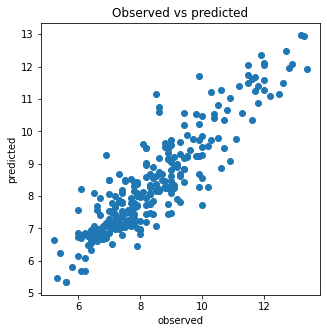

In [ ]:
plt.figure(figsize=(5,5))
plt.xlabel('observed')
plt.ylabel('predicted')
plt.title("Observed vs predicted")
plt.scatter(GB_combined_df['observed_data'], GB_combined_df['predicted_data'])

### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
def create_model(learn_rate=0.01):
# create model
    model = Sequential()
    model.add(Dense(18, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(36, input_dim=18, kernel_initializer='normal', activation='relu'))
    model.add(Dense(18, input_dim=36, kernel_initializer='normal', activation='relu'))
    model.add(Dense(9, input_dim=18, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error','mae', 'mape'])
    return model

# create model
model = KerasRegressor(build_fn=create_model)

#define the grid search parameters
param_grid = {'batch_size' : [50, 150, 300],
              'epochs' : [50, 70, 100],
              'learn_rate' : [0.001, 0.01, 0.1]
              }
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(norm_X_train, Y_train)
NN_Y_predict = grid.predict(norm_X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  from ipykernel import kernelapp as app


Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 23/50
4/4 [==============================] - 0s 5ms/step - loss: 27.3429 - mean_squared_error: 27.3429 - mae: 4.9746 - mape: 57.6646
Epoch 24/50
4/4 [==============================] - 0s 7ms/step - loss: 18.7909 - mean_squared_error: 18.7909 - mae: 4.0263 - mape: 46.0764
Epoch 25/50
4/4 [==============================] - 0s 5ms/step - loss: 11.0474 - mean_squared_error: 11.0474 - mae: 2.9240 - mape: 32.7155
Epoch 26/50
4/4 [==============================] - 0s 5ms/step - loss: 5.3330 - mean_squared_error: 5.3330 - mae: 1.8372 - mape: 20.0885
Epoch 27/50
4/4 [==============================] - 0s 5ms/step - loss: 2.8374 - mean_squared_error: 2.8374 - mae: 1.2855 - mape: 14.9329
Epoch 28/50
4/4 [==============================] - 0s 6ms/step - loss: 3.1318 - mean_squared_error: 3.1318 - mae: 1.4160 - mape: 18.1019
Epoch 29/50
4/4 [==============================] - 0s 6ms/step - loss: 4.1361 - mean_squared_error: 4.13

In [ ]:
print("Best params:", grid.best_params_)
print("Best cross validaton score", grid.best_score_)   

Best params: {'batch_size': 50, 'epochs': 100, 'learn_rate': 0.001}
Best cross validaton score -0.4114919900894165


In [ ]:
NN_r2 = r2_score(Y_test, NN_Y_predict)
NN_rmse = sqrt(mean_squared_error(Y_test, NN_Y_predict))
print("R^2: ", NN_r2, "  RMSE: ", NN_rmse) # найти табличку R2-задача регрессии

R^2:  0.8649313741445356   RMSE:  0.621566616927354


In [ ]:
NN_combined_df = pd.DataFrame({'observed_data' : Y_test, 'predicted_data' : NN_Y_predict})
NN_combined_df

,observed_data,predicted_data
1333,9.1,9.174342
747,8.6,8.634780
1206,7.2,7.460107
1113,8.9,10.014753
1051,8.5,8.660390
...,...,...
1525,6.7,6.796433
1245,7.4,7.227461
1011,8.9,8.736320
979,12.2,10.505856


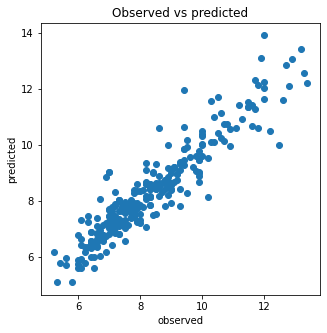

In [ ]:
plt.figure(figsize=(5,5))
plt.xlabel('observed')
plt.ylabel('predicted')
plt.title("Observed vs predicted")
plt.scatter(NN_combined_df['observed_data'], NN_combined_df['predicted_data'])

## Summary  Table

In [ ]:
pd.DataFrame({'Model' : [ 'Liniar Regression', 'Ridge Regression','Elastic Net','Lasso','CVM','Random Forest','Gradient Boosting','Neural Network'],
              'R^2' : [linear_rm_r2,ridge_grid_search_r2, en_search_r2,lasso_search_r2,svm_r2,RF_r2,GB_r2,NN_r2],
              'RMSE' : [linear_rm_rmse, ridge_grid_search_rmse, en_search_rmse,lasso_search_rmse, svm_rmse, RF_rmse,GB_rmse,NN_rmse]})

,Model,R^2,RMSE
0,Liniar Regression,0.804272,0.748233
1,Ridge Regression,0.804337,0.748108
2,Elastic Net,0.804403,0.747983
3,Lasso,0.804272,0.748233
4,CVM,0.817333,0.722837
5,Random Forest,0.811323,0.734631
6,Gradient Boosting,0.839675,0.677191
7,Neural Network,0.864931,0.621567
